### Load Data

In [21]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('game_data_cleaned.csv')
print(len(data))
print(data.columns)

458
Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG.', 'X3P', 'X3PA', 'X3P.', 'X2P', 'X2PA', 'X2P.', 'eFG.',
       'FT', 'FTA', 'FT.', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS'],
      dtype='object')


### Preprocess Data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = data[['FG', 'FGA', 'FG.',
                 'X3P', 'X3PA', 'X3P.',
                 'X2P', 'X2PA', 'X2P.',
                 'eFG.',
                 'FT', 'FTA', 'FT.', 
                 'ORB', 'DRB', 'TRB', 
                 'AST', 'STL', 'BLK', 
                 'TOV', 'PF', 'PTS']]
target = data['Pos']


# Show descriptive statistics for numerical features
# print(features.describe())

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
print(len(X_train), len(X_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



343 115


In [24]:
unique_values = list(set(target))

# Print the unique values
print(unique_values)

['C', 'PF', 'SG', 'SF', 'PG']


### Baseline

In [42]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are defined elsewhere in your code

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Most frequent class in the training set
most_frequent_class = np.bincount(y_train_encoded).argmax()

# Predict the most frequent class for all test instances
predictions = np.full(shape=y_test_encoded.shape, fill_value=most_frequent_class)

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, predictions)
f1 = f1_score(y_test_encoded, predictions, average='weighted')
recall = recall_score(y_test_encoded, predictions, average='weighted')
precision = precision_score(y_test_encoded, predictions, average='weighted')

# Print the metrics
print('Baseline Model (Most Frequent Class) Evaluation:')
print(f'Accuracy: {accuracy:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Precision: {precision:.3f}')


Baseline Model (Most Frequent Class) Evaluation:
Accuracy: 0.252
F1 Score: 0.102
Recall: 0.252
Precision: 0.064


c:\Users\djp11\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### kNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
report_readable = classification_report(y_test, y_pred, zero_division=0)

print(report_readable)

# Calculate overall accuracy, F1 score, recall, and precision
overall_accuracy = accuracy_score(y_test, y_pred)
overall_f1 = f1_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_precision = precision_score(y_test, y_pred, average='weighted')

# Print overall metrics
print(f"Overall Accuracy: {overall_accuracy:.3f}")
print(f"Overall F1 Score: {overall_f1:.3f}")
print(f"Overall Recall: {overall_recall:.3f}")
print(f"Overall Precision: {overall_precision:.3f}")


              precision    recall  f1-score   support

           C       0.72      0.82      0.77        22
          PF       0.26      0.20      0.23        25
          PG       0.67      0.45      0.54        22
          SF       0.29      0.47      0.36        17
          SG       0.46      0.45      0.46        29

    accuracy                           0.47       115
   macro avg       0.48      0.48      0.47       115
weighted avg       0.48      0.47      0.47       115

Overall Accuracy: 0.470
Overall F1 Score: 0.467
Overall Recall: 0.470
Overall Precision: 0.482


### Neural Network

Epoch 1, Training Loss: 1.5622678995132446, Test Loss: 1.5081590414047241
Epoch 2, Training Loss: 1.4601162672042847, Test Loss: 1.4310547709465027
Epoch 3, Training Loss: 1.361639400323232, Test Loss: 1.3548843264579773
Epoch 4, Training Loss: 1.2602095405260723, Test Loss: 1.2927777767181396
Epoch 5, Training Loss: 1.188231348991394, Test Loss: 1.235477328300476
Epoch 6, Training Loss: 1.1221661567687988, Test Loss: 1.1714125871658325
Epoch 7, Training Loss: 1.0436394214630127, Test Loss: 1.103765606880188
Epoch 8, Training Loss: 0.9905903041362762, Test Loss: 1.052256464958191
Epoch 9, Training Loss: 0.9113348623116811, Test Loss: 1.0156257152557373
Epoch 10, Training Loss: 0.9077787498633066, Test Loss: 0.9910571277141571
Epoch 11, Training Loss: 0.869432141383489, Test Loss: 0.9661301970481873
Epoch 12, Training Loss: 0.8229291836420695, Test Loss: 0.940977156162262
Epoch 13, Training Loss: 0.7903425196806589, Test Loss: 0.9208125472068787
Epoch 14, Training Loss: 0.78826391696929

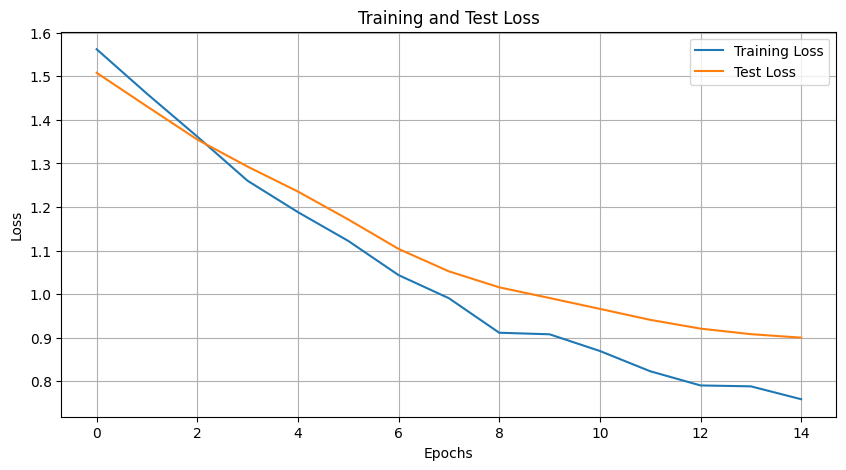

              precision    recall  f1-score   support

           C       0.74      0.91      0.82        22
          PF       0.55      0.44      0.49        25
          PG       0.67      0.64      0.65        22
          SF       0.37      0.41      0.39        17
          SG       0.64      0.62      0.63        29

    accuracy                           0.61       115
   macro avg       0.59      0.60      0.60       115
weighted avg       0.61      0.61      0.60       115

Accuracy: 0.609
F1 Score: 0.604
Recall: 0.609
Precision: 0.605


In [47]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are defined elsewhere in your code
X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32))

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, len(label_encoder.classes_))
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

def train_model(num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                test_loss += loss.item()
        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')


def evaluate_model():
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            predictions.extend(predicted.numpy())
            targets.extend(target.numpy())
    
    report = classification_report(targets, predictions, target_names=label_encoder.classes_, zero_division=0)
    print(report)
    
    accuracy = accuracy_score(targets, predictions)
    f1 = f1_score(targets, predictions, average='weighted')
    recall = recall_score(targets, predictions, average='weighted')
    precision = precision_score(targets, predictions, average='weighted')

    print(f'Accuracy: {accuracy:.3f}')
    print(f'F1 Score: {f1:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'Precision: {precision:.3f}')

train_model(15)

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

evaluate_model()